In [1]:
import torch
import torch.nn as nn
import torchtext.legacy.data as ttd
import torchtext.vocab as GloVe
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [5]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.columns = ['labels', 'data']

In [7]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# Create binary labels
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})

In [9]:
df2 = df[['data', 'b_labels']]

In [10]:
df2.head()

,data,b_labels
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [11]:
df2.to_csv('spam2.csv', index=False)

In [12]:
TEXT = ttd.Field(sequential=True, batch_first=True, lower=False, pad_first=True)
LABEL = ttd.Field(sequential=False, use_vocab=False, is_target=True)

In [13]:
dataset = ttd.TabularDataset(
    path='spam2.csv',
    format='csv',
    skip_header=True,
    fields=[('data', TEXT), ('label', LABEL)]
)

In [16]:
train_dataset, test_dataset = dataset.split()

In [17]:
TEXT.build_vocab(train_dataset,)

In [18]:
vocab = TEXT.vocab

In [20]:
vocab.stoi

defaultdict(<bound method Vocab._default_unk_index of <torchtext.vocab.Vocab object at 0x000001F2FA2BEA00>>,
            {'<unk>': 0,
             '<pad>': 1,
             'to': 2,
             'you': 3,
             'I': 4,
             'a': 5,
             'the': 6,
             'and': 7,
             'in': 8,
             'is': 9,
             'i': 10,
             'u': 11,
             'for': 12,
             'my': 13,
             'me': 14,
             'your': 15,
             'of': 16,
             'on': 17,
             'have': 18,
             '2': 19,
             'that': 20,
             'are': 21,
             'call': 22,
             'it': 23,
             'at': 24,
             'be': 25,
             'or': 26,
             'not': 27,
             'with': 28,
             'get': 29,
             'can': 30,
             'will': 31,
             'U': 32,
             "I'm": 33,
             'ur': 34,
             'so': 35,
             'but': 36,
             '4': 37,
      

In [21]:
vocab.itos

['<unk>',
 '<pad>',
 'to',
 'you',
 'I',
 'a',
 'the',
 'and',
 'in',
 'is',
 'i',
 'u',
 'for',
 'my',
 'me',
 'your',
 'of',
 'on',
 'have',
 '2',
 'that',
 'are',
 'call',
 'it',
 'at',
 'be',
 'or',
 'not',
 'with',
 'get',
 'can',
 'will',
 'U',
 "I'm",
 'ur',
 'so',
 'but',
 '4',
 'from',
 'You',
 '&lt;#&gt;',
 'do',
 'up',
 'go',
 'just',
 'we',
 'when',
 'if',
 'this',
 'like',
 'all',
 '.',
 'come',
 'know',
 'got',
 'out',
 'now',
 'was',
 '?',
 'am',
 'Call',
 '...',
 'by',
 'send',
 'about',
 'want',
 'then',
 'only',
 'time',
 'what',
 'going',
 'need',
 'How',
 'one',
 'our',
 "I'll",
 'no',
 'still',
 'as',
 'text',
 'If',
 'n',
 'there',
 'No',
 'Just',
 'But',
 'he',
 'So',
 'its',
 'back',
 'been',
 'has',
 'love',
 'r',
 'some',
 'We',
 'how',
 'think',
 'see',
 'any',
 '&',
 'Do',
 "don't",
 'good',
 'Ok',
 'home',
 'And',
 'My',
 'day',
 'take',
 'What',
 'Your',
 'who',
 'tell',
 'Ì_',
 'FREE',
 'make',
 'they',
 'free',
 'The',
 'an',
 'phone',
 'her',
 'Have',
 

In [22]:
device = torch.device('cuda:0')

In [27]:
train_iter, test_iter = ttd.Iterator.splits(
    (train_dataset, test_dataset),
    sort_key=lambda x: len(x.data),
    batch_sizes=(32, 256),
    device=device)

In [29]:
for inputs, targets in train_iter:
    print('INPUTS:', inputs, 'SHAPE:', inputs.shape)
    print('TARGETS:', targets, 'SHAPE:', targets.shape)
    break

INPUTS: tensor([[    1,     1,     1,  ...,     8,   339,  4066],
        [    1,     1,     1,  ...,   299, 10853,    58],
        [    1,     1,     1,  ...,  9323,    23,   813],
        ...,
        [    1,     1,     1,  ...,   142,   175,   157],
        [    1,     1,     1,  ...,    25, 11814,   216],
        [    1,     1,     1,  ...,  3496,  3314,  3007]], device='cuda:0') SHAPE: torch.Size([32, 41])
TARGETS: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1], device='cuda:0') SHAPE: torch.Size([32])


In [30]:
for inputs, targets in test_iter:
    print('INPUTS:', inputs, 'SHAPE:', inputs.shape)
    print('TARGETS:', targets, 'SHAPE:', targets.shape)
    break

INPUTS: tensor([[ 699,   44,  905,  442, 1338,    0],
        [1063,  304,  187,   62, 1359,  184],
        [   0,    4,  323,   23,   50,  909],
        ...,
        [   1,    1,    1,    1,    1,  559],
        [   1,    1,    1,    1,    1,  598],
        [   1,    1,    1,    1,    1,  559]], device='cuda:0') SHAPE: torch.Size([256, 6])
TARGETS: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        

In [31]:
# DEFINE THE MODEL
class RNN(nn.Module):
    def __init__(self, n_vocab, embed_dim, n_hidden, n_rnnlayers, n_outputs):
        super(RNN, self).__init__()
        self.V = n_vocab
        self.D = embed_dim
        self.M = n_hidden
        self.L = n_rnnlayers
        self.K = n_outputs
        
        self.embed = nn.Embedding(self.V, self.D)
        self.rnn = nn.LSTM(input_size=self.D, hidden_size=self.M, num_layers=self.L, batch_first=True)
        self.fc = nn.Linear(self.M, self.K)
    
    def forward(self, X):
        h0 = torch.zeros(self.L, X.size(0), self.M).to(device)
        c0 = torch.zeros(self.L, X.size(0), self.M).to(device)
        
        out = self.embed(X)
        
        out, _ = self.rnn(out, (h0,c0))
        out, _ = torch.max(out, 1)
        
        out = self.fc(out)
        
        return out

In [32]:
model = RNN(len(vocab), 20, 15, 1, 1)
model.to(device)

RNN(
  (embed): Embedding(12367, 20)
  (rnn): LSTM(20, 15, batch_first=True)
  (fc): Linear(in_features=15, out_features=1, bias=True)
)

In [33]:
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters())

In [39]:
def batch_grad(model, criterion, optimizer, train_iter, test_iter, epochs):
    train_losses = np.zeros(epochs)
    test_losses = np.zeros(epochs)
    for i in range(epochs):
        t0 = datetime.now()
        train_loss = []
        for inputs, targets in train_iter:
            targets = targets.view(-1, 1).float()
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
        
            loss.backward()
            optimizer.step()
        
            train_loss.append(loss.item())
            
        train_loss = np.mean(train_loss)
        
        test_loss = []
        for inputs, targets in test_iter:
            targets = targets.view(-1, 1).float()
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            test_loss.append(loss.item())
        test_loss = np.mean(test_loss)
        
        train_losses[i] = train_loss
        test_losses[i] = test_loss
        
        dt = datetime.now() - t0
        print(f'Epoch {i+1}/{epochs}, Train Loss: {train_loss:.4f},\t Test Loss: {test_loss:.4f}, Duration: {dt}')
        
    return train_losses, test_losses

In [40]:
train_losses, test_losses = batch_grad(model, criterion, optimizer, train_iter, test_iter, 20)

Epoch 1/20, Train Loss: 0.3451,	 Test Loss: 0.3874, Duration: 0:00:01.629315
Epoch 2/20, Train Loss: 0.2622,	 Test Loss: 0.2922, Duration: 0:00:01.612769
Epoch 3/20, Train Loss: 0.1762,	 Test Loss: 0.2503, Duration: 0:00:01.643346
Epoch 4/20, Train Loss: 0.1262,	 Test Loss: 0.2289, Duration: 0:00:01.425094
Epoch 5/20, Train Loss: 0.0959,	 Test Loss: 0.2130, Duration: 0:00:01.398354
Epoch 6/20, Train Loss: 0.0776,	 Test Loss: 0.2030, Duration: 0:00:01.439745
Epoch 7/20, Train Loss: 0.0619,	 Test Loss: 0.2004, Duration: 0:00:01.332616
Epoch 8/20, Train Loss: 0.0523,	 Test Loss: 0.1967, Duration: 0:00:01.372124
Epoch 9/20, Train Loss: 0.0436,	 Test Loss: 0.1919, Duration: 0:00:01.334983
Epoch 10/20, Train Loss: 0.0387,	 Test Loss: 0.1960, Duration: 0:00:01.321957
Epoch 11/20, Train Loss: 0.0312,	 Test Loss: 0.1824, Duration: 0:00:01.323697
Epoch 12/20, Train Loss: 0.0273,	 Test Loss: 0.1797, Duration: 0:00:01.289447
Epoch 13/20, Train Loss: 0.0233,	 Test Loss: 0.1866, Duration: 0:00:01.32

<function matplotlib.pyplot.legend(*args, **kwargs)>

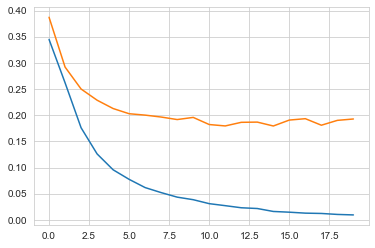

In [41]:
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.legend

In [43]:
n_correct = 0.
n_total= 0.
for inputs, targets in train_iter:
    targets = targets.view(-1, 1).float()
    
    outputs = model(inputs)
    predictions = (outputs  > 0)
    
    n_correct += (predictions == targets).sum().item()
    n_total += targets.shape[0]
train_acc = n_correct / n_total

n_correct = 0.
n_total= 0.
for inputs, targets in test_iter:
    targets = targets.view(-1, 1).float()
    
    outputs = model(inputs)
    predictions = (outputs  > 0)
    
    n_correct += (predictions == targets).sum().item()
    n_total += targets.shape[0]
test_acc = n_correct / n_total

print(f'Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}')

Train Accuracy: 0.9987, Test Accuracy: 0.9498


In [44]:
df[df['labels'] == 'spam'].size / df.size

0.13406317300789664

In [45]:
from sklearn.metrics import confusion_matrix
import itertools

In [46]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Confusion Matrix is Normalized')
    else:
        print('Confusion Matrix was normalized before')
    
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment='center', color='white' if cm[i, j] > thresh else 'black')
        
    plt.tight_layout()
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

In [ ]:
p_train = []
y_train = []
for inputs, targets in train_iter:
    targets = targets.view(-1, 1).float()
    
    outputs = model(inputs)
    predictions = list((outputs > 0).cpu().numpy())
    
    p_train += predictions
    y_train += targets.cpu().numpy

p_train = np.array(p_train)
y_train = np.array(y_train)
train_acc = np.mean(y_train == p_train)

p_test = []
y_test = []
for inputs, targets in test_iter:
    targets = targets.view(-1, 1).float()
    
    outputs = model(inputs)
    predictions = list((outputs > 0).cpu().numpy())
    
    p_test += predictions
    y_test += (targets.cpu().numpy)

p_test = np.array(p_test)
y_test = np.array(y_test)
test_acc = np.mean(y_test == p_test)

print(f'Train accuracy: {train_acc:.4f}, Test accuracy: {test_acc:.4f}')

In [58]:
# MAKE PREDICTIONS
df[df.labels == 'spam'].sample(3)

,labels,data,b_labels
4066,spam,You are being contacted by our Dating Service ...,1
1766,spam,SMS AUCTION You have won a Nokia 7250i. This i...,1
2094,spam,PRIVATE! Your 2004 Account Statement for 07742...,1
